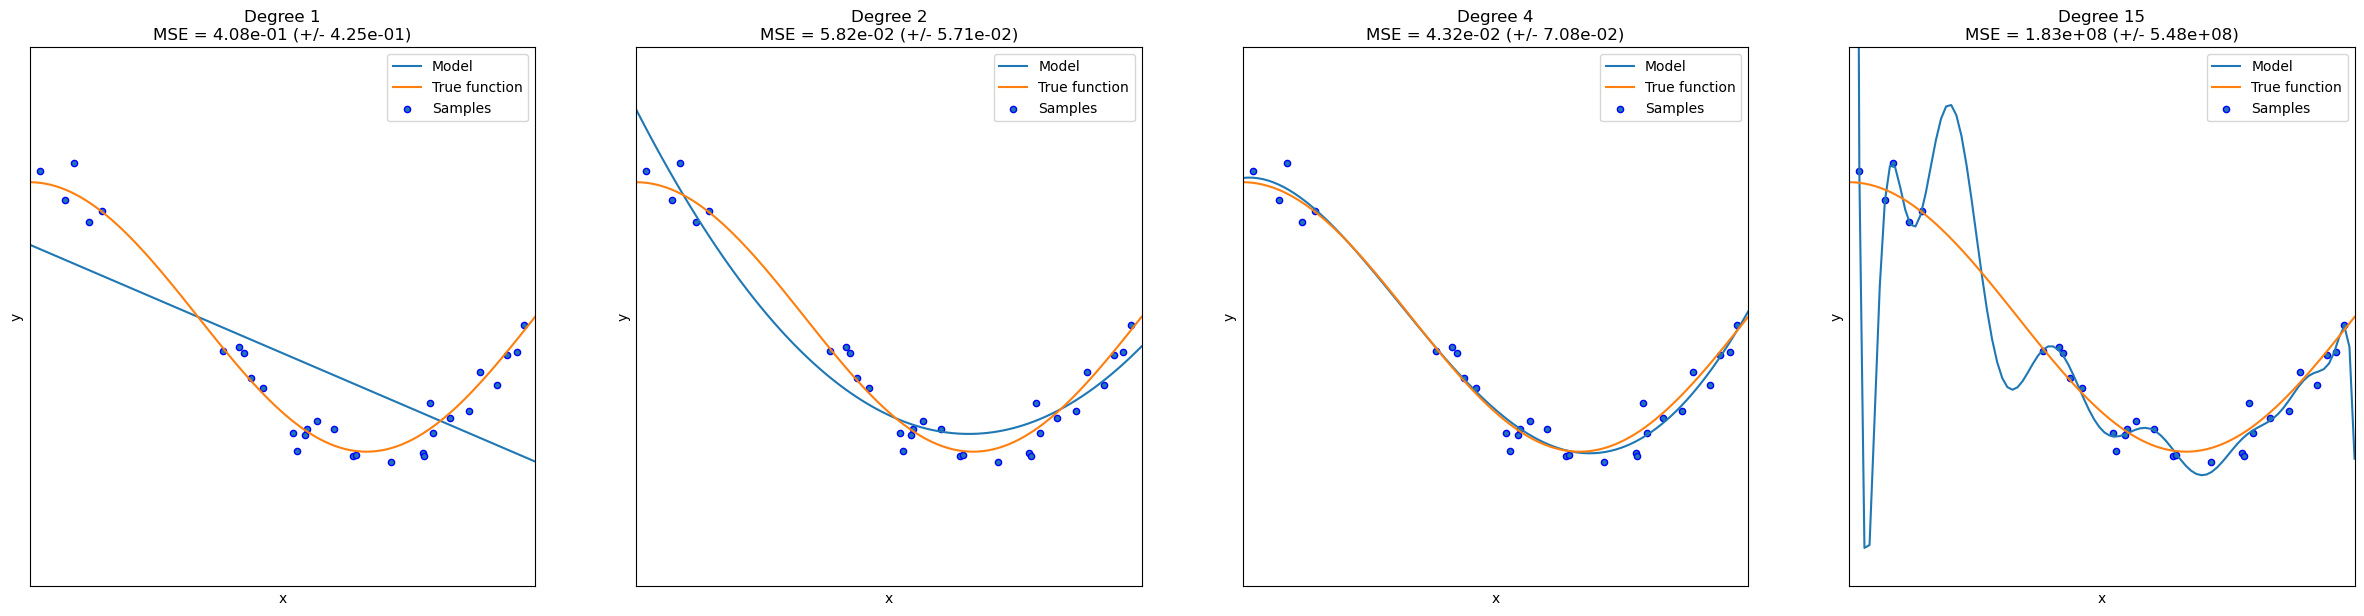

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(x):
    return np.cos(1.5 * np.pi * x)

np.random.seed(0)

n_samples = 30
degrees = [1, 2, 4, 15]

x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(30, 7))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ])
    pipeline.fit(x[:, np.newaxis], y)

    # Évaluation du modèle par validation croisée
    scores = cross_val_score(
        pipeline, x[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")
    plt.plot(x_test, true_fun(x_test), label="True function")
    plt.scatter(x, y, edgecolor="b", s=20, label="Samples")  # s=20 au lieu de s=2° (erreur de frappe)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e} (+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )

plt.show()


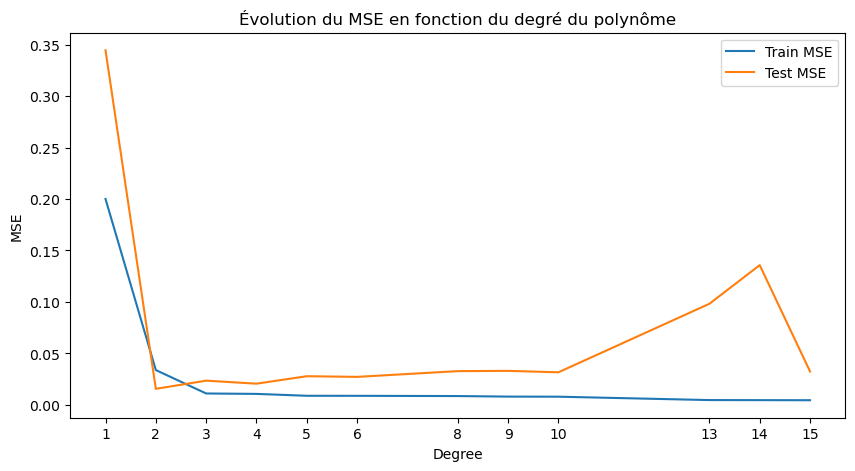

In [8]:
# On va calculer le MSE (et on peut en déduire le RMSE si besoin)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def true_fun(x):
    return np.cos(1.5 * np.pi * x)

np.random.seed(0)

n_samples = 30
degrees = [1, 2, 3, 4, 5, 6, 8, 9, 10, 13, 14, 15]

x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1  # corrigé "samples" en "n_samples"

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

mse_train = []
mse_test = []

for d in degrees:
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    linear_regression = LinearRegression()  # corrigé nom de variable
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ])
    pipeline.fit(x_train[:, np.newaxis], y_train)

    y_train_pred = pipeline.predict(x_train[:, np.newaxis])
    y_test_pred = pipeline.predict(x_test[:, np.newaxis])

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 5))
plt.plot(degrees, mse_train, label="Train MSE")
plt.plot(degrees, mse_test, label="Test MSE")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.xticks(degrees)
plt.legend(loc="best")
plt.title("Évolution du MSE en fonction du degré du polynôme")
plt.show()
